# Сборный проект: Исследование рынка игр

## Краткое описание проекта
Интернет-магазин продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года и нужно спланировать кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

## Цель проекта
Провести исследование данных, выявить определяющие успешность игры закономерности и подготовить рекомендации по проведению рекламной компании на 2017 год.

## Задачи проекта
#### 1. Загрузить данные и изучить общую информацию.

#### 2. Провести предобработку данных.

#### 3. Провести исследовательский анализ данных:
- определить сколько игр выпускалось в разные годы;
- проанализировать, как менялись продажи по платформам. Определить платформы с наибольшими суммарными продажами и построить распределение по годам; 
- проанализировать, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков; 
- проанализировать общее распределение игр и продаж по жанрам.

#### 4. Составить портрет пользователя каждого региона. Определить для пользователя каждого региона (NA, EU, JP):
- самые популярные платформы (топ-5). Описать различия в долях продаж;
- самые популярные жанры (топ-5);

Оценить влияет ли рейтинг ESRB на продажи в отдельном регионе.

#### 5. Проверить гипотезы:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

#### 6. Сформулировать выводы и рекомендации.

## Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Шаг 1. Загрузка данных и анализ общей информации

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# загрузим данные
try:
    df = pd.read_csv('games.csv') 
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
# приведем названия столбцов к нижнему регистру
df.columns = [x.lower() for x in df.columns]

In [4]:
# получим общую информацию о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# посмотрим на количество уникальных данных по столбцам
df.nunique()

name               11559
platform              31
year_of_release       37
genre                 12
na_sales             402
eu_sales             307
jp_sales             244
other_sales          155
critic_score          82
user_score            96
rating                 8
dtype: int64

In [6]:
# посчитаем количество уникальных записей
df[['name', 'platform', 'year_of_release']].drop_duplicates().shape[0]

16713

Столбца с уникальными данными нет, но есть уникальные сочетания данных из 3-х столбцов.

#### Выводы
Данные не полные. Типы данных в столбцах **year_of_release** и **user_score** не соответствуют хранимым данным.

## Шаг 2. Предобоработка и подготовка данных

### Преобразование типов данных

In [7]:
# посмотрим на временные данные (min, max, пропуски в каких-либо периодах)
df['year_of_release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

In [8]:
# переведём данные в тип дата и выделим только год
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y').dt.year
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [9]:
# проверим тип
df['year_of_release'].dtypes

dtype('float64')

Мы перевели данные в дату и выделили год. В результате таких действий должен был получиться тип данных - целочисленный. Но так как в данных есть пропуски, то получился тип float. В принципе можно было и не переводить. 

Если перевести в дату и не выделять год, то получится формат 2006-01-01 - менее удобный (особенно при визуализации данных), чем 2006. Оставим этот тип данных.

In [10]:
# посмотрим на уникальные значения столбца "user_score"
df['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Перевести значения столбца "user_score" в тип float сейчас нельзя из-за наличия строкового значения "tbd". Аббревиатура "tbd" обычно означает "to be determined" или "to be decided" и используется для указания, что оценка еще не определена или неизвестна. Для обеспечения возможности выполнения операций с данными столбца переведём "tbd" в NaN.

In [11]:
# посчитаем количество пропущенных значений
df['user_score'].isna().sum()

6701

In [12]:
# посчитаем объем значений "tbd"
df[df['user_score']=='tbd'].shape[0]

2424

In [13]:
# заменим "tbd" на NaN
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [14]:
# посчитаем количество пропущенных значений и проверим преобразования (то, что данные не пропали)
df['user_score'].isna().sum()

9125

In [15]:
# переведём значения столбца "user_score" в тип float
df['user_score'] = df['user_score'].astype(float)

In [16]:
# проверим
df['user_score'].dtypes

dtype('float64')

#### Выводы
Мы изменили типы данных в столбце **user_score** на float.

### Работа с дубликатами

In [17]:
# проверим наличие явных дубликатов
df.duplicated().sum()

0

In [18]:
# проверим наличие неявных дубликатов в столбце "name" 
# посчитаем количество уникальных значений в столбце "name" сейчас и после перевода в нижний регистр
len(df['name'].unique())

11560

In [19]:
# посчитаем количество уникальных значений в столбце "name" после перевода в нижний регистр
len(df['name'].str.lower().unique())

11560

Неявных дубликатов в столбце "name" не обнаружено

#### Выводы
Явных и неявных дубликатов  не обнаружено

### Работа с пропущенными данными

In [20]:
# посчитаем долю и количество пропущенных данных
df.isna().agg(['mean', 'sum']).T

,mean,sum
name,0.000120,2.0
platform,0.000000,0.0
year_of_release,0.016093,269.0
genre,0.000120,2.0
na_sales,0.000000,0.0
eu_sales,0.000000,0.0
jp_sales,0.000000,0.0
other_sales,0.000000,0.0
critic_score,0.513192,8578.0
user_score,0.545917,9125.0


Визуализируем пропущенные данные, чтобы увидеть как менялись пропуски со временем, и как связаны пропуски в разных столбцах между собой.

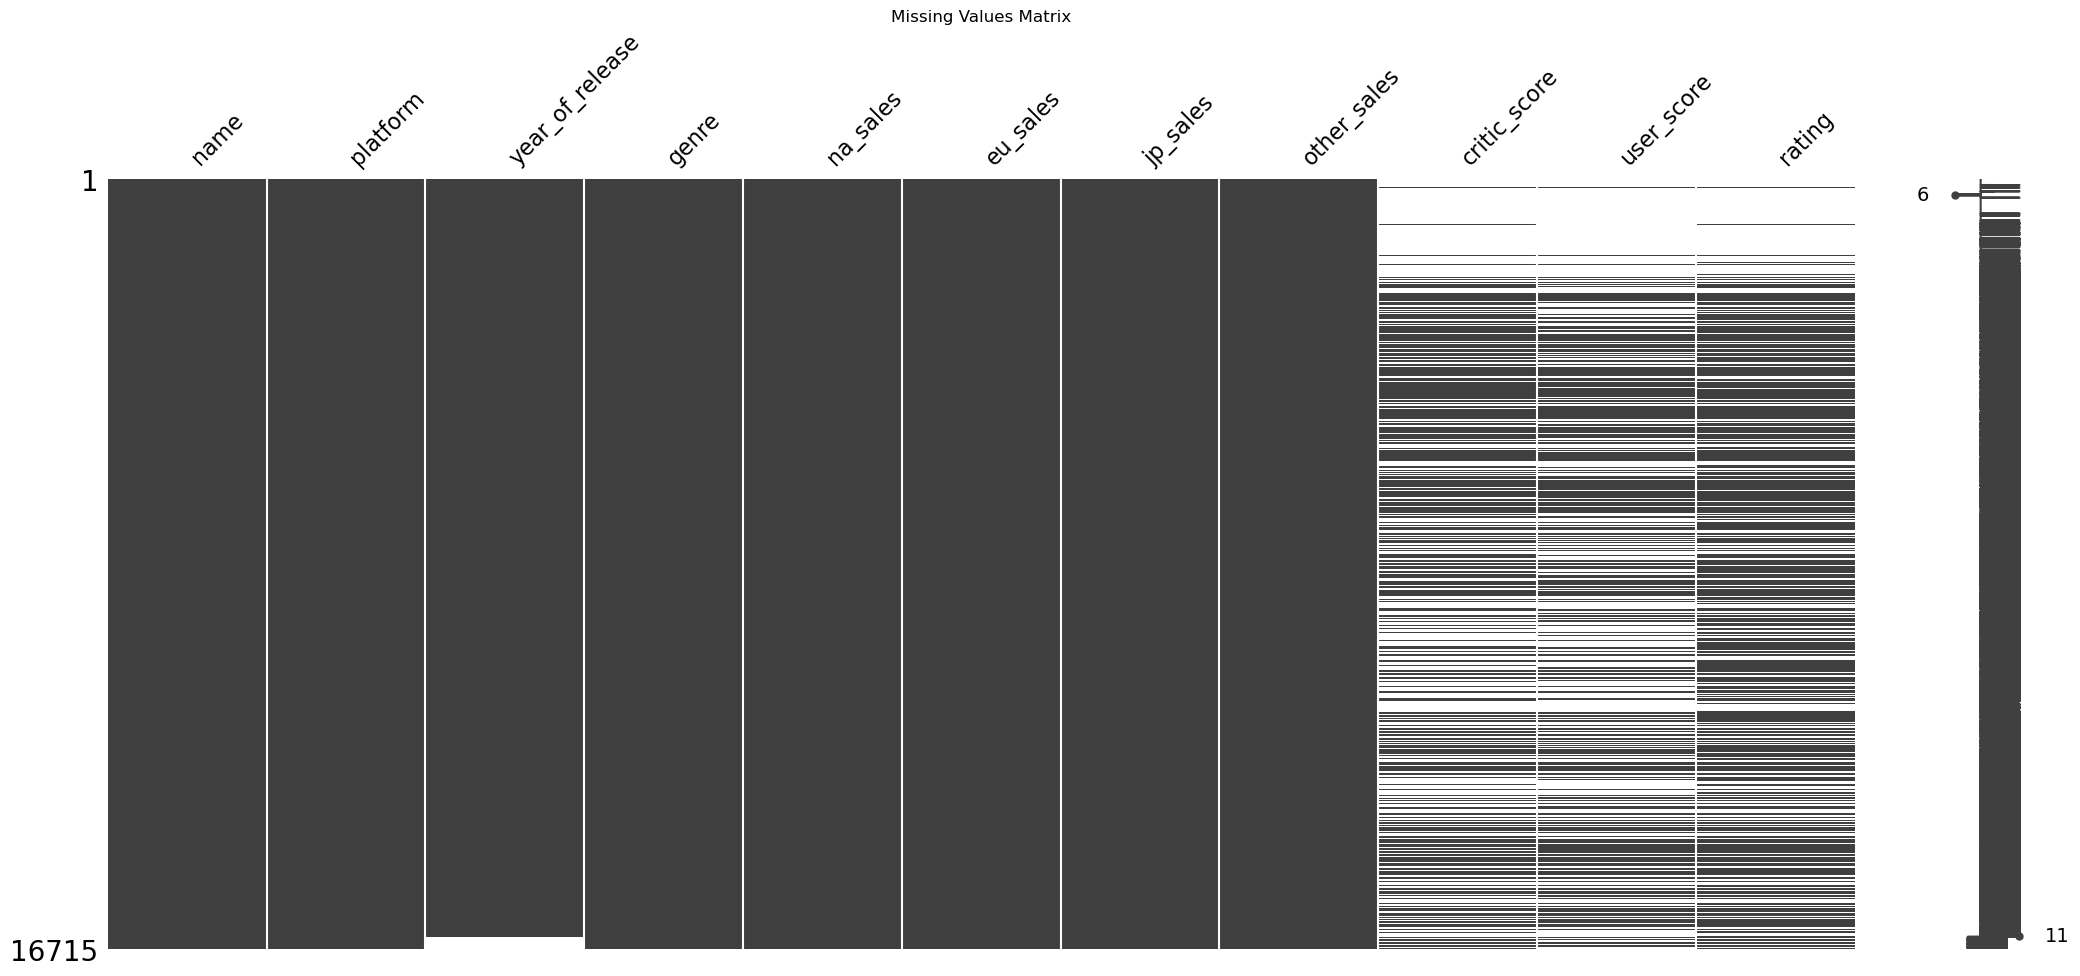

In [21]:
import missingno as msno
import matplotlib.pyplot as plt

# Создание графика пропущенных значений
# распределение по времени
msno.matrix(df.sort_values(by='year_of_release')) 

# Добавление названий столбцов
plt.title('Missing Values Matrix')
plt.show()

Здесь видно что в начале периода (в 1980-х годах) данные не заполнялись  в некоторые столбцы

А здесь видно, что в 3-х столбцах  пропуски в тех же строках. Не было данных "оценки критиков" и одновременно не было данных "оценки пользователей". Это означает, что нельзя заполнить одни пропущенные данные по известным другим.

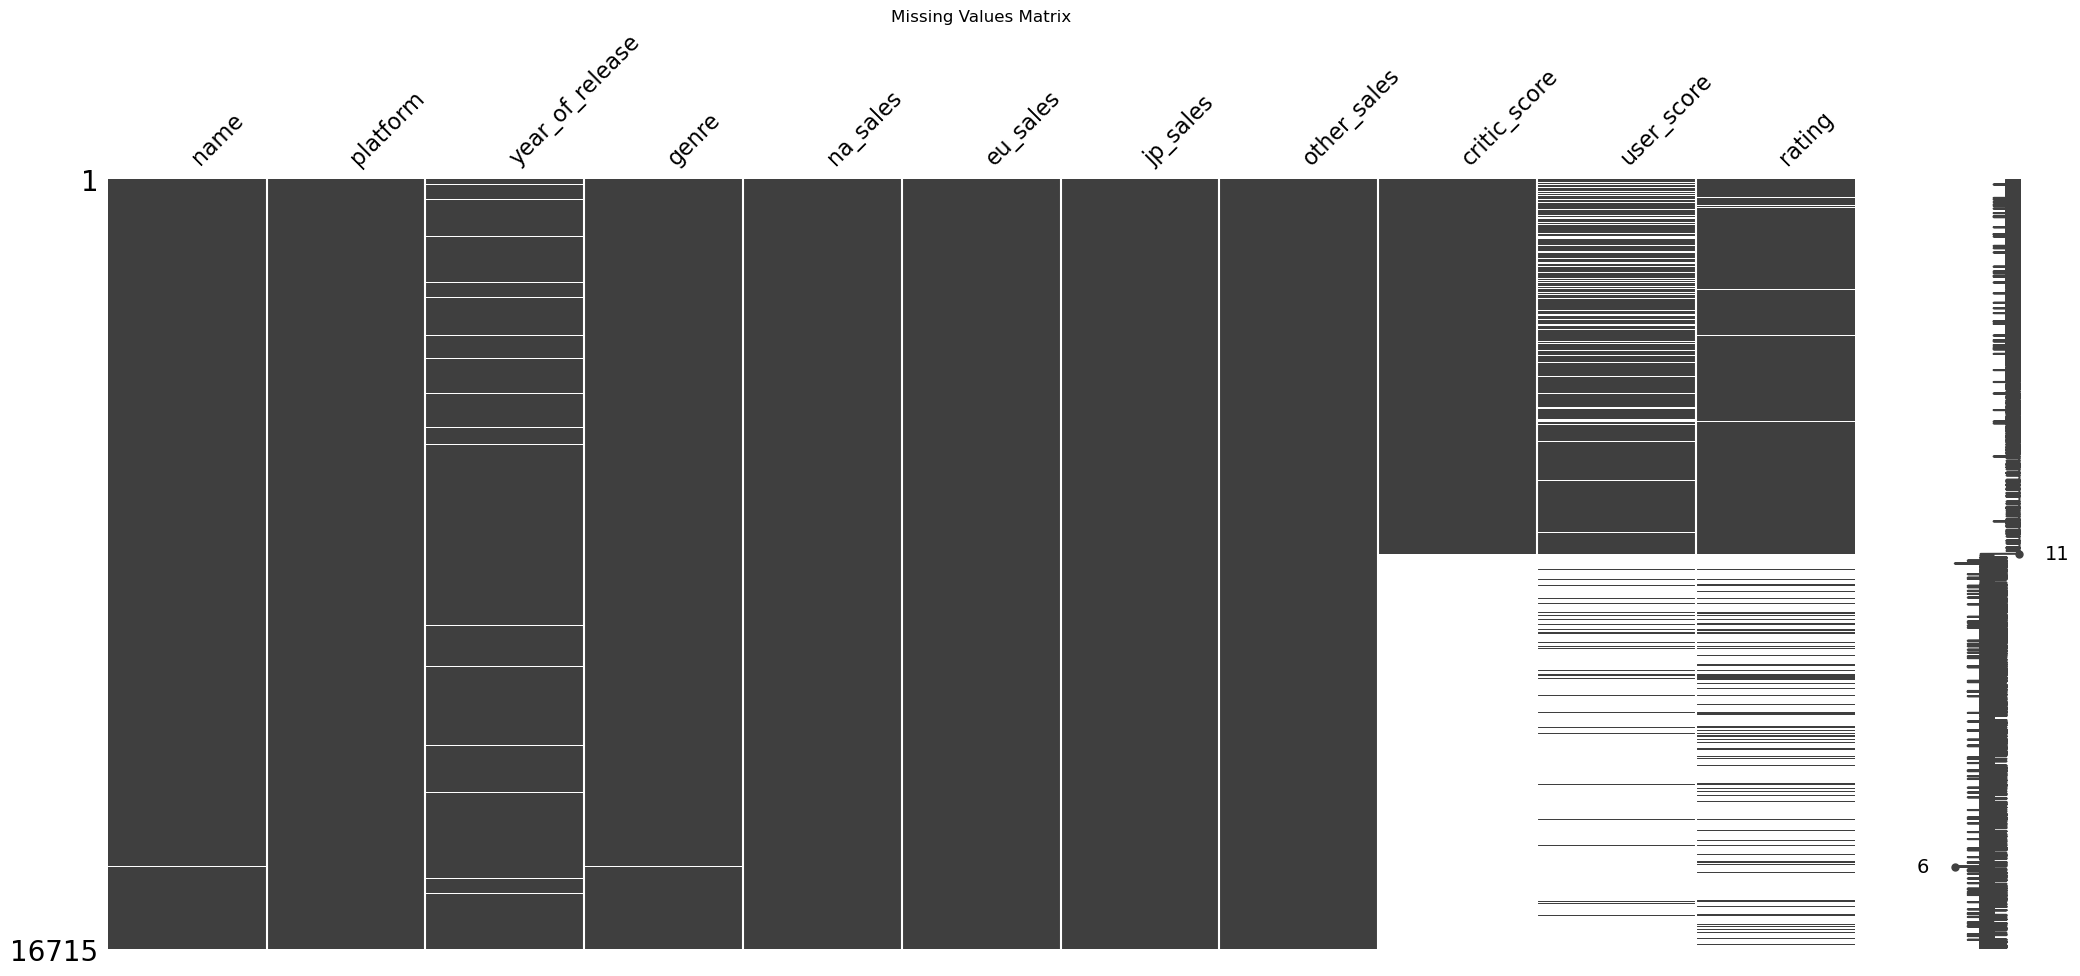

In [22]:
# Создание графика пропущенных значений
msno.matrix(df.sort_values(by='critic_score'))

# Добавление названий столбцов
plt.title('Missing Values Matrix')
plt.show()

#### Выводы
Пропуски данных в основном связаны с двумя причинами. С одной стороны в начале 1980-х годов играм практически не давали оценок и не присваивали рейтинг. С другой стороны не всем играм давали оценки и присваивали рейтинги, и это практически одни и те же игры. Можно предположить, что наименее интересным играм не давали оценки критики, пользователи и мало присваивали рейтинги.

В столбцах **name** и **genre** пропущено по 2 данных в каждом 

In [23]:
# посмотрим на эти данные
df[df['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Оставим пропуски без изменений, т.к не видно каких-либо оснований для заполнения.

В столбце **year_of_release** пропущено 269 данных, также пока оставим пропуски без изменений, т.к не видно каких-либо оснований для заполнения, а удалять данные не хотелось бы, чтобы не уменьшать выборки.

В столбцах **critic_score** и **user_score** пропущено по 51% и 55% соответственно. Это очень много. Было бы неплохо их заполнить, но и не внести существенные искажения. 

In [24]:
# посмотрим на уникальные значения оценок критиков
df['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

In [25]:
# посмотрим на корреляцию между числовыми значениями данных
df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales','critic_score', 'user_score']].corr()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
na_sales,1.000000,0.765335,0.449594,0.638649,0.240755,0.086200
eu_sales,0.765335,1.000000,0.435061,0.722792,0.220752,0.055337
jp_sales,0.449594,0.435061,1.000000,0.291089,0.152593,0.125598
other_sales,0.638649,0.722792,0.291089,1.000000,0.198554,0.057119
critic_score,0.240755,0.220752,0.152593,0.198554,1.000000,0.580878
user_score,0.086200,0.055337,0.125598,0.057119,0.580878,1.000000


Корреляция между оценками критиков и пользователей заметная (0,58).

Корреляция между оценками критиков и продажами слабая (от 0,24 до 0,15).

Корреляция между оценками пользователей и продажами слабая (от 0,12 до 0,055).

Учитывая, что корреляция между оценками критиков и пользователей заметная, можно попробовать заполнить пропущенные данные в оценках с помощью линейной регрессии. По данным столбца 'critic_score' заполнить пропуске в столбце 'user_score' и наоборот.

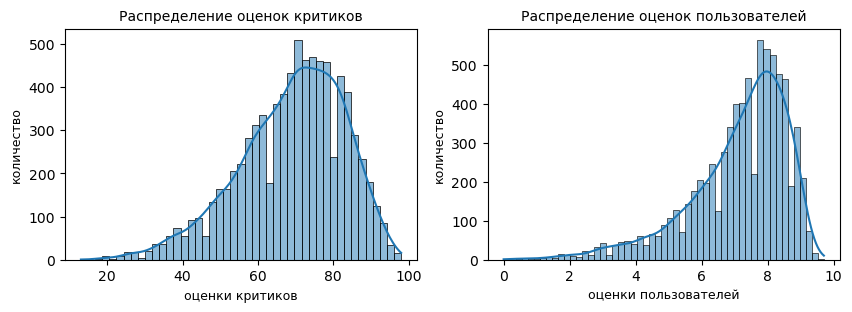

In [26]:
# посмотрим на распределение оценок критиков и пользователей
import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(figsize=(10, 3))

plt.subplot(1, 2, 1)
ax=sns.histplot(data=df, x='critic_score', kde=True)
ax.set_title('Распределение оценок критиков', fontsize=10)
ax.set_xlabel('оценки критиков', fontsize=9)
ax.set_ylabel('количество', fontsize=9)

plt.subplot(1, 2, 2)
ax=sns.histplot(data=df, x='user_score', kde=True)
ax.set_title('Распределение оценок пользователей', fontsize=10)
ax.set_xlabel('оценки пользователей', fontsize=9)
ax.set_ylabel('количество', fontsize=9);

Распределения достаточно похожи. У оценок пользователей мода распределения сдвинута немного вправо и небольшая скошенность влево по сравнению с распределением оценок критиков.

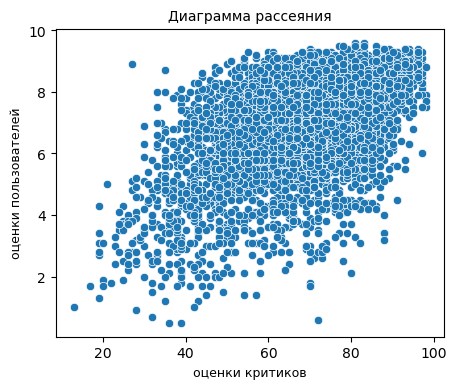

In [27]:
# посмотрим на диаграмму рассеяния
fig, ax = plt.subplots(figsize=(5, 4))

ax=sns.scatterplot(data=df, x='critic_score', y='user_score')
ax.set_title('Диаграмма рассеяния', fontsize=10)
ax.set_xlabel('оценки критиков', fontsize=9)
ax.set_ylabel('оценки пользователей', fontsize=9);

Посчитаем количество данных, которые мы можем потенциально заполнить

In [28]:
# количество пропущенных данных в столбце 'user_score' которым соответсвуют данные в столбце 'critic_score'
df[df['user_score'].isna()]['critic_score'].count()

1120

In [29]:
# количество пропущенных данных в столбце 'critic_score' которым соответсвуют данные в столбце 'user_score'
df[df['critic_score'].isna()]['user_score'].count()

573

Количество данных, которые можно заполнить, небольшое и принципиально картину не изменит. Но всё же попробуем.

In [30]:
# импортируем необходимые библиотеки
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# cоздание DataFrame только с непропущенными значениями 'critic_score' и 'user_score'
df_filled = (df[['critic_score', 'user_score']].dropna(subset=['critic_score', 'user_score']))

# выделение признаков и целевых переменных
X = df_filled.drop(columns=['critic_score'])
y = df_filled['critic_score']

#разделим данные на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# создание модели линейной регрессии
reg_critic = LinearRegression()

# обучение модели
reg_critic.fit(X_train, y_train)

# получим предсказания для модели 
y_pred = reg_critic.predict(X_test)

In [31]:
# Расчет метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)

MAE: 8.744625234400397
MSE: 122.78599731125105
R2: 0.33001112031483903


Метрики модели слабые. Учитывая это и относительно небольшое количество данных, которое можно заполнить, заполнять пропуски не будем. 

In [32]:
# посмотрим на уникальные значения
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [33]:
# посчитаем количество уникальных значений
df['rating'].value_counts()

rating
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: count, dtype: int64

In [34]:
# посчитаем количество пропущенных данных
df['rating'].isna().sum()

6766

Для того, чтобы не потерять игры, которые не имеют рейтинга и исследовать их, заменим пропуски на строку "unrated".

In [35]:
# заменим пропуски на 'unrated'
df['rating'].fillna('unrated', inplace = True)

In [36]:
# проверим преобразование
df['rating'].isna().sum()

0

### Посчитаем суммарные продажи во всех регионах 

In [37]:
df['sales_total'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)

In [38]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unrated,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unrated,31.38


### Выводы
На этапе предобработки данных мы выполнили следующее.

Изменили тип данных в столбце **user_score** на float.

Перевели аббревиатуру **"tbd"** в столбце **user_score** в **NaN** для обеспечения возможности выполнения операций с данными столбца ("tbd" обычно означает "to be determined" или "to be decided" и используется для указания, что оценка еще не определена или неизвестна).

В столбце **rating** заменили пропущенные значения на **'unrated'** для того, чтобы не потерять игры, которые не имеют рейтинга и включить их в исследование.

## Шаг 3. Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы

In [39]:
#сгруппируем наименования игр по годам и посчитаем количество
data = df.groupby('year_of_release')['name'].count().reset_index()
data.rename(columns={'name':'count'}, inplace=True)
data

,year_of_release,count
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


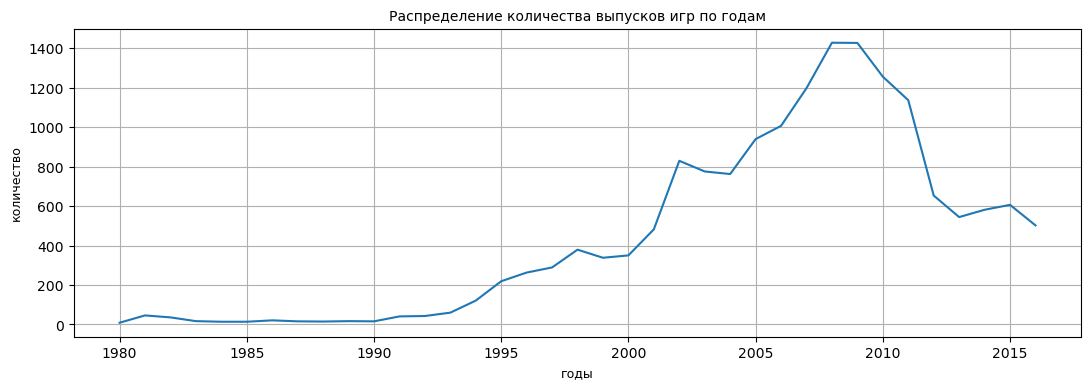

In [40]:
# построим Распределение количества выпусков игр по годам
fig, ax = plt.subplots(figsize=(13, 4))

ax=sns.lineplot(data=data, x='year_of_release', y='count')
ax.set_title('Распределение количества выпусков игр по годам', fontsize=10)
ax.set_ylabel('количество', fontsize=9)
ax.set_xlabel('годы', fontsize=9)
ax.grid(True);

Выпуски игр начали расти примерно с 1993 года до 2008. С 2009 по 2016 год количество выпусков упало более чем в 2 раза.

Для прогноза продаж в 2017 году период до 2008 - 2009 годов не важен, так как выпуски игр устойчиво снижаются и продажи в 2017 году будут продолжением этого тренда.

In [41]:
# посчитаем количество продаж по годам
data = df.groupby('year_of_release')['sales_total'].sum().reset_index()

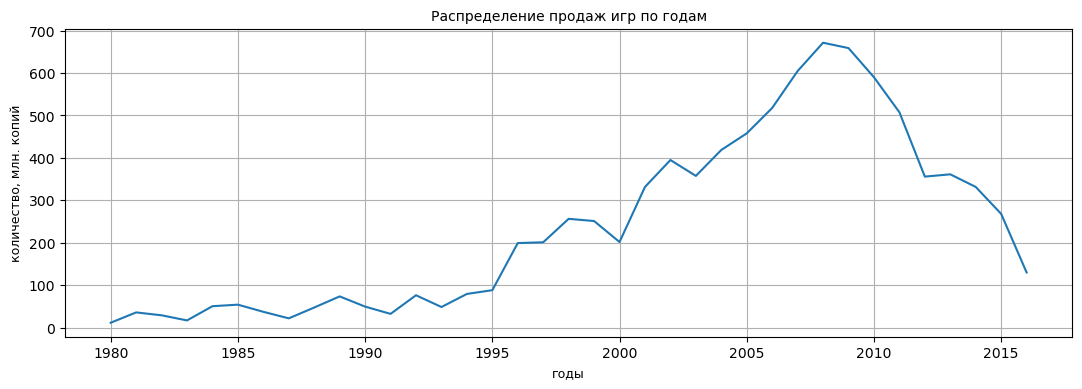

In [42]:
# визуализируем количество продаж по годам
fig, ax = plt.subplots(figsize=(13, 4))

ax=sns.lineplot(data=data, x='year_of_release', y='sales_total')
ax.set_title('Распределение продаж игр по годам', fontsize=10)
ax.set_ylabel('количество, млн. копий', fontsize=9)
ax.set_xlabel('годы', fontsize=9)
ax.grid(True);

Распределение продаж и выпусков игр достаточно близки. Продажи игр устойчиво снижаются с 2008 года.

### Анализ распределения продаж по платформам

In [43]:
# выберем платформы с наибольшими суммарными продажами
df.groupby('platform')['sales_total'].sum().sort_values(ascending=False).head(25)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
Name: sales_total, dtype: float64

In [44]:
# посмотрим на описательную статитстику продаж по платформам
df.groupby('platform')['sales_total'].sum().describe()

count      31.000000
mean      287.603548
std       348.160256
min         0.030000
25%        23.360000
50%       200.040000
75%       304.095000
max      1255.770000
Name: sales_total, dtype: float64

In [45]:
# выберем в топ 18 лучших платформ с трехзначными показателями продаж
top_platform = df.groupby('platform')['sales_total'].sum().sort_values(ascending=False).head(18).reset_index()
top_platform

,platform,sales_total
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


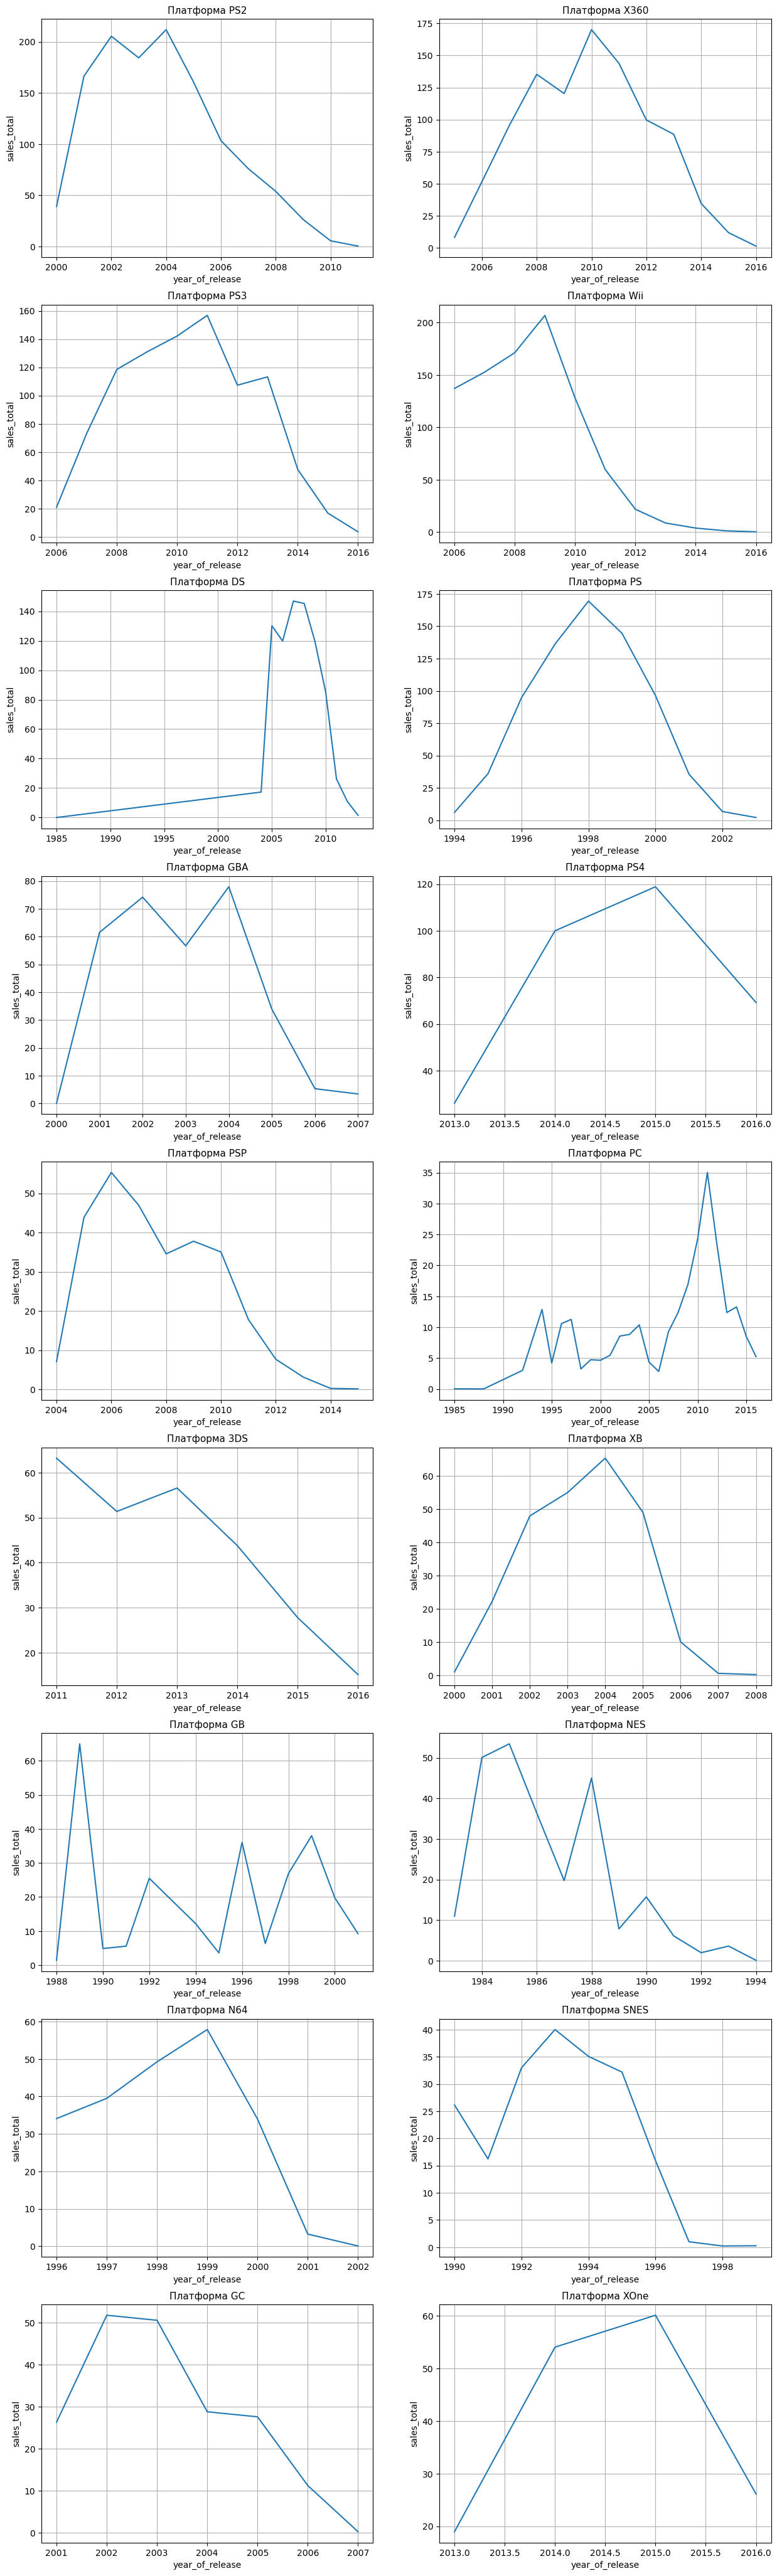

In [46]:
# визуализируем распределение продаж по платформам
fig, ax = plt.subplots(figsize=(15, 70))

i=1

for platform in top_platform['platform']:
    data = df[df['platform'] == platform].groupby('year_of_release')['sales_total'].sum().reset_index()
    plt.subplot(12, 2, i)
    ax=sns.lineplot(data=data, x='year_of_release', y='sales_total')
    ax.set_title('Платформа ' + platform, fontsize=11)
    ax.grid(True)     
    i+=1

На большинстве платформ продажи закончились до 2016 года. На тех платформах, на которых в 2016 годы были продажи, тренд нисходящий.

In [47]:
# Выберем платформы, на которых были продажи в 2016 году
df[df['year_of_release'] == 2016].groupby('platform')['sales_total'].sum().sort_values(ascending=False)

platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Wii      0.18
Name: sales_total, dtype: float64

Определим актуальный период (который будем использовать для прогноза на 2017 год) с 2014 по 2016 год.

**Выше перечисленные платформы могут принести выручку в 2017 году. Рекламный ресур стоит направить на несколько наиболее успешных платформ, например на: PS4, XOne, 3DS.**

In [48]:
# Рассчитаем время жизни платформ

platform_lifetime=[]

for platform in df['platform'].unique():
    data = df[df['platform'] == platform]
    platform_lifetime.append(data['year_of_release'].max() - data['year_of_release'].min())
    
top_platform['platform_lifetime'] = pd.Series(platform_lifetime)
top_platform

,platform,sales_total,platform_lifetime
0,PS2,1255.77,10.0
1,X360,971.42,11.0
2,PS3,939.65,13.0
3,Wii,907.51,28.0
4,DS,806.12,11.0
5,PS,730.86,10.0
6,GBA,317.85,11.0
7,PS4,314.14,9.0
8,PSP,294.05,7.0
9,PC,259.52,3.0


In [49]:
# посмотрим на описательную статистику времени жизни платформ
pd.Series(platform_lifetime).describe()

count    31.000000
mean      7.612903
std       6.998464
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      31.000000
dtype: float64

Всего 31 платформа. Среднее время жизни платформ - 7,6 года, медиана - 6 лет. Стандартное отклонение достаточно большое - 7 лет, разброс от 0 до 31 года

**Построим отдельные графики продаж для каждой платформы за актуальный период**

In [50]:
df = df[df['year_of_release'] >= 2014]
platforms_2014_2016 = df.groupby('platform')['sales_total'].sum().sort_values(ascending=False).head(18).reset_index()
platforms_2014_2016

,platform,sales_total
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22
5,WiiU,42.98
6,PC,27.05
7,PSV,22.40
8,Wii,5.07
9,PSP,0.36


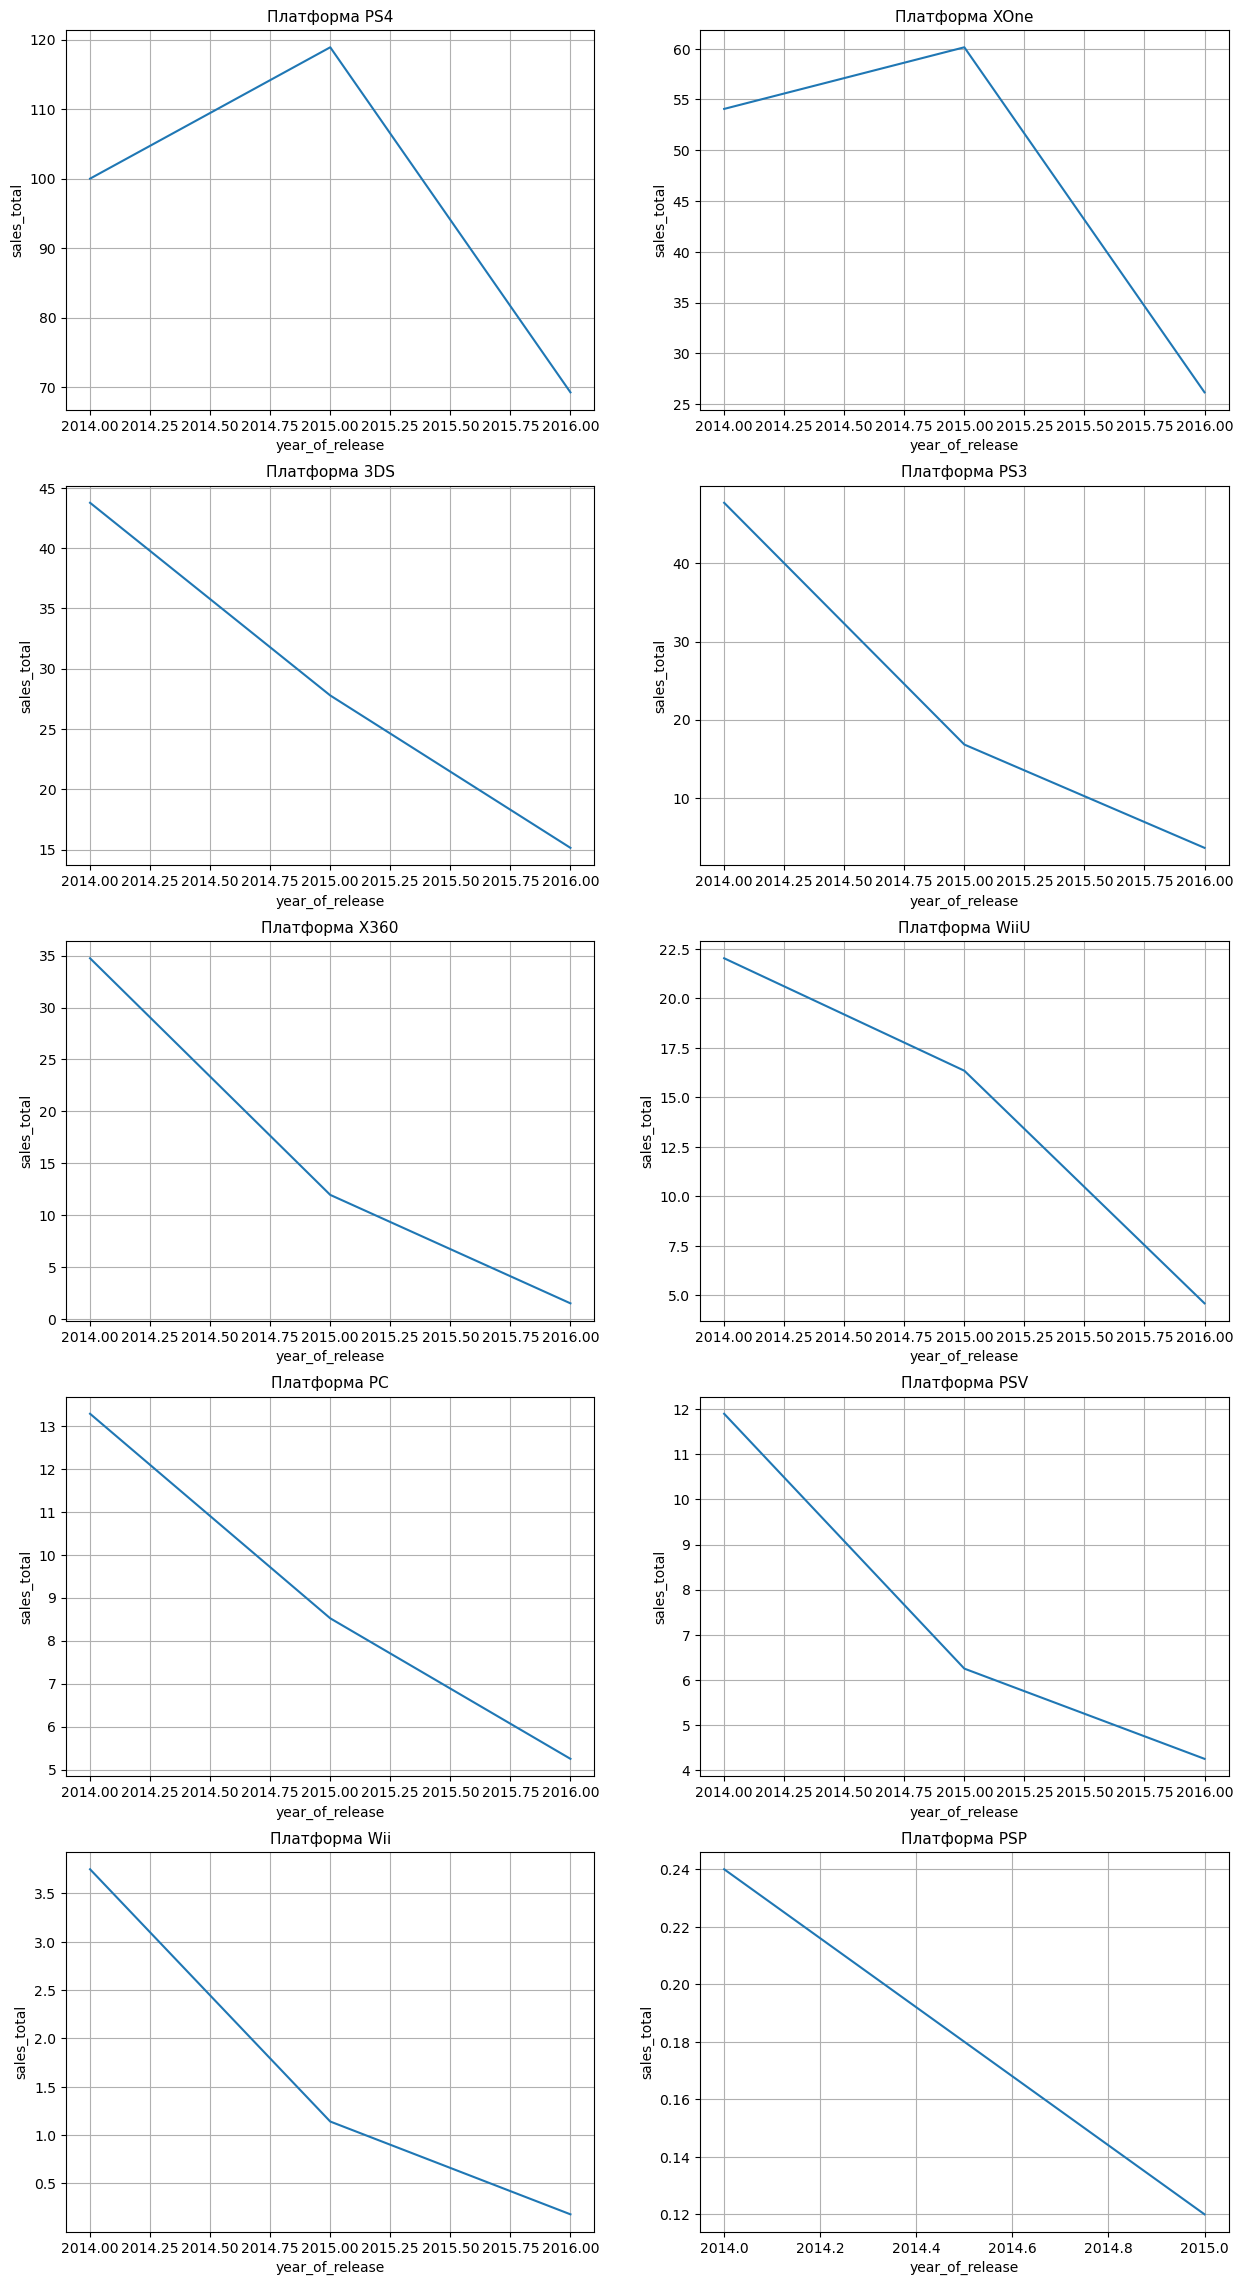

In [51]:
# визуализируем распределение продаж по платформам
fig, ax = plt.subplots(figsize=(15, 70))

i=1

for platform in platforms_2014_2016['platform']:
    data = df[df['platform'] == platform].groupby('year_of_release')['sales_total'].sum().reset_index()
    plt.subplot(12, 2, i)
    ax=sns.lineplot(data=data, x='year_of_release', y='sales_total')
    ax.set_title('Платформа ' + platform, fontsize=11)
    ax.grid(True)     
    i+=1

По продажам в 2016 году лидируют платформы PS4, XOne и 3DS. На всех платформах продажи снижаются, растущих по продажам платформ нет.

In [52]:
# отберём платформы, на которых были продажи в 2016 году
df[df['year_of_release'] == 2016].groupby('platform')['sales_total'].sum().sort_values(ascending=False)

platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Wii      0.18
Name: sales_total, dtype: float64

In [53]:
# отберём платформы, наиболее перспективные с точки зрения возможных продаж в 2017 году 
promising_platforms = df[df['year_of_release'] == 2016]\
.groupby('platform')['sales_total'].sum().sort_values(ascending=False).reset_index()[:3]

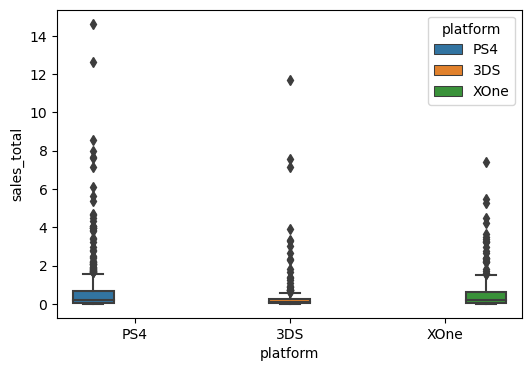

In [54]:
# построим boxplot по глобальным продажам игр в разбивке по перспективным платформам
fig, ax = plt.subplots(figsize=(6, 4))

data = df[df['platform'].isin(promising_platforms['platform'])]

sns.boxplot(x='platform', y='sales_total', data=data, hue='platform', orient='v');

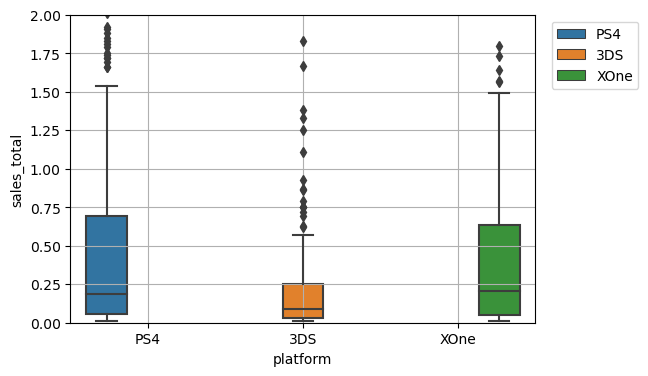

In [55]:
# ограничим значения по оси у
fig, ax = plt.subplots(figsize=(6, 4))

data = df[df['platform'].isin(promising_platforms['platform'])]

sns.boxplot(x='platform', y='sales_total', data=data, hue='platform', orient='v');
ax.set_ylim(0, 2)
ax.grid(True)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left'); 

В большинстве случаев продажи по платформам распределяются в диапазоне 0.1 - 0.75. Медианы находятся в районе 0,25 и ниже. При этом распределения имеют очень длинные правые "хвосты". Отдельные продажи превышают медианные значения в десятки раз. 

#### Анализ влияния на продажи отзывов пользователей и критиков

In [56]:
# рассчитаем корреляцию между отзывами и продажами на платформе PS4
df[df['platform']=='PS4'][['critic_score', 'user_score', 'sales_total']].corr()

,critic_score,user_score,sales_total
critic_score,1.000000,0.546434,0.402661
user_score,0.546434,1.000000,-0.040132
sales_total,0.402661,-0.040132,1.000000


Мы видим умеренную корреляцию продаж и оценок критиков и отсутствие корреляции с оценками пользователей. Посмотрим на сколько это характерно и для других платформ в сумме. 

In [57]:
# рассчитаем корреляцию между отзывами и продажами на всех платформах
df[['critic_score', 'user_score', 'sales_total']].corr()

,critic_score,user_score,sales_total
critic_score,1.000000,0.50446,0.328105
user_score,0.504460,1.00000,-0.013070
sales_total,0.328105,-0.01307,1.000000


Корреляция существенно ниже, но остается умеренной для оценок критиков. 

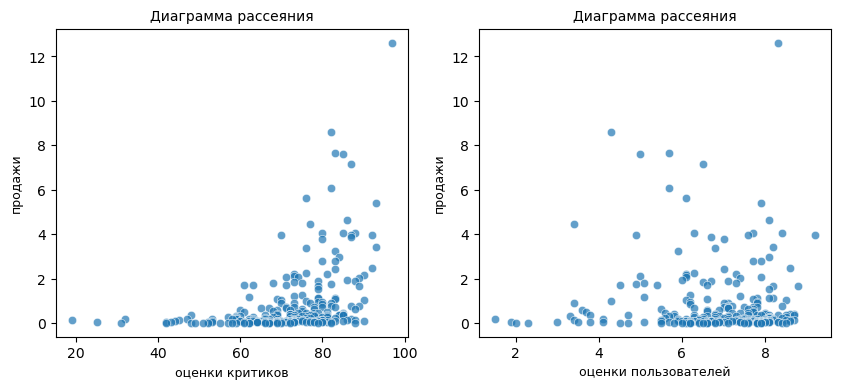

In [58]:
# построим Диаграмму рассеяния между продажами и оценками критиков и пользователей для платформы PS4
data = df[df['platform']=='PS4']

fig, ax = plt.subplots(figsize=(10, 4))

plt.subplot(1, 2, 1)
ax=sns.scatterplot(data=data, x='critic_score', y='sales_total', alpha=0.7)
ax.set_title('Диаграмма рассеяния', fontsize=10)
ax.set_xlabel('оценки критиков', fontsize=9)
ax.set_ylabel('продажи', fontsize=9);

plt.subplot(1, 2, 2)
ax=sns.scatterplot(data=data, x='user_score', y='sales_total', alpha=0.7)
ax.set_title('Диаграмма рассеяния', fontsize=10)
ax.set_xlabel('оценки пользователей', fontsize=9)
ax.set_ylabel('продажи', fontsize=9);

Видно, что связь не линейная (больше похожа на экспоненту), поэтому рассчитаем коррреляции ещё по методу Спирмена и Кендалла. method='kendall'

In [59]:
# рассчитаем корреляцию между отзывами и продажами на платформе PS4 по методу Спирмена
df[df['platform']=='PS4'][['critic_score', 'user_score', 'sales_total']].corr(method='spearman')

,critic_score,user_score,sales_total
critic_score,1.000000,0.442835,0.503512
user_score,0.442835,1.000000,-0.005280
sales_total,0.503512,-0.005280,1.000000


По методу Спирмена корреляция явно выше.

In [60]:
# рассчитаем корреляцию между отзывами и продажами на платформе PS2 по методу Кендалла
df[df['platform']=='PS4'][['critic_score', 'user_score', 'sales_total']].corr(method='kendall')

,critic_score,user_score,sales_total
critic_score,1.000000,0.321618,0.357568
user_score,0.321618,1.000000,-0.003320
sales_total,0.357568,-0.003320,1.000000


In [61]:
# средние продажи игр
df['sales_total'].mean()

0.4318827708703375

In [62]:
# средние продажи игр с оценкой критиков > 70
df[df['critic_score'] > 70]['sales_total'].mean()

0.8466146993318486

In [63]:
# средние продажи игр без оценок критиков 
df[df['critic_score'].isna()]['sales_total'].mean()

0.29119464469618955

#### Выводы
Продажи зависят от оценок критиков и пользователей. Зависимость от оценок критиков существенно сильнее. Зависимость нелинейная. При самых высоких оценках критиков и пользователей возможны очень высокие продажи, в десятки раз превышающие средние значения.

#### Анализ распределения игр по жанрам.

In [64]:
# посмотрим на распределение количества игр по жанрам
df.groupby('genre')['name'].count().sort_values(ascending=False)

genre
Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: name, dtype: int64

In [65]:
# посмотрим на распределение средних продаж по жанрам
df.groupby('genre')['sales_total'].mean().sort_values(ascending=False)

genre
Shooter         1.335469
Sports          0.680000
Platform        0.476053
Fighting        0.470333
Role-Playing    0.459005
Racing          0.398841
Misc            0.332301
Action          0.322068
Simulation      0.298409
Puzzle          0.157857
Strategy        0.107027
Adventure       0.094865
Name: sales_total, dtype: float64

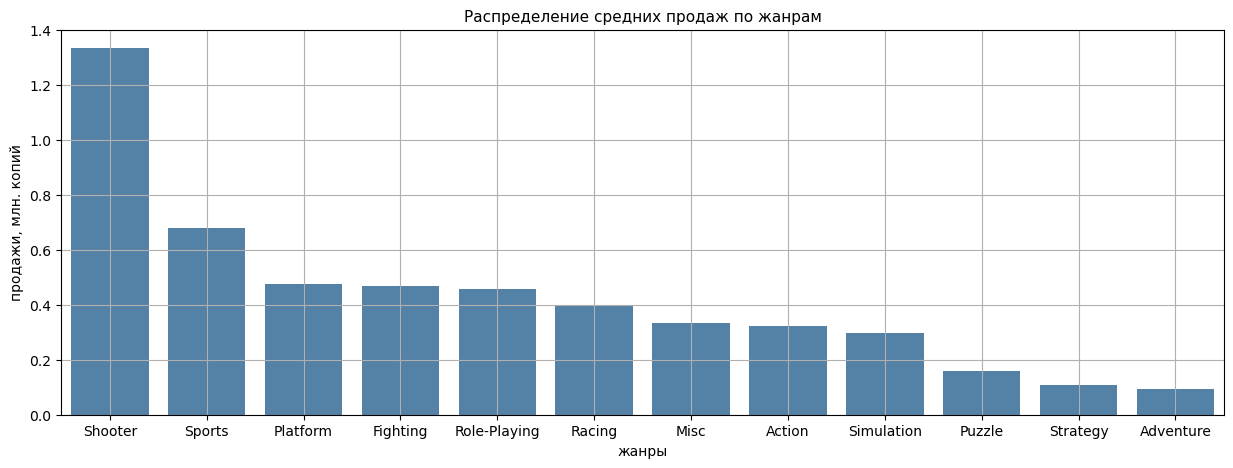

In [66]:
# визуализируем распределение средних продаж по жанрам
fig, ax = plt.subplots(figsize=(15, 5))

data = df.groupby('genre')['sales_total'].mean().sort_values(ascending=False).reset_index()
ax=sns.barplot(data=data, x='genre', y='sales_total', color='steelblue')
ax.set_title('Распределение средних продаж по жанрам', fontsize=11)
ax.set_xlabel('жанры', fontsize=10)
ax.set_ylabel('продажи, млн. копий', fontsize=10)
ax.grid(True)     

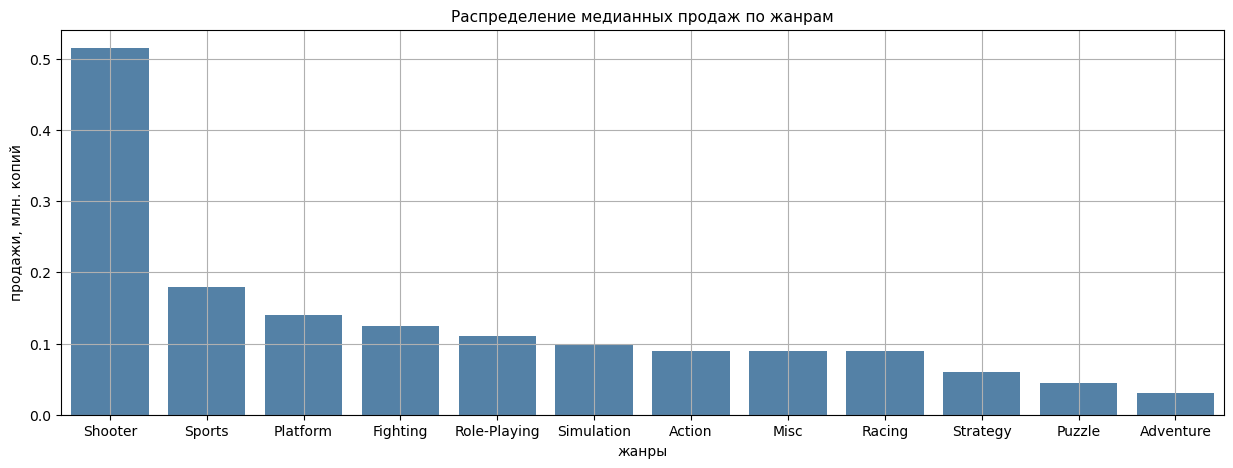

In [67]:
# визуализируем распределение медианных продаж по жанрам
fig, ax = plt.subplots(figsize=(15, 5))

data = df.groupby('genre')['sales_total'].median().sort_values(ascending=False).reset_index()
ax=sns.barplot(data=data, x='genre', y='sales_total', color='steelblue')
ax.set_title('Распределение медианных продаж по жанрам', fontsize=11)
ax.set_xlabel('жанры', fontsize=10)
ax.set_ylabel('продажи, млн. копий', fontsize=10)
ax.grid(True)     

#### Выводы
Продажи игр существенно зависят от жанра.   

Топ-5 жанров по средним продажам игр:   Shooter, Platform, Sports, Role-Playing, Racing.

Топ-5 жанров по медианным продажам игр: Shooter, Platform, Sports, Fighting, Racing.

Средние продажи игр в разы превышают медианные, это говорит о том, что есть отдельные игры с очень большим количеством продаж.

## Шаг 4. Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
- самые популярные платформы (топ-5) 
- самые популярные жанры (топ-5). 


Оценим влияние рейтинга ESRB на продажи в отдельном регионе.

In [68]:
#  напишем функцию для получения ТОП-5 платформ и жанров по продажам в каждом регионе
def sales_distribution(feature, region):
    distr_sales = df.groupby(feature)[[region]].sum().sort_values(by= region, ascending=False)[:5].reset_index()
    sales_total = df[region].sum()
    distr_sales['percentage_of_total'] = round(distr_sales[region] / sales_total * 100, 2)
    display(distr_sales)   

In [69]:
# получим ТОП-5 платформ по продажам в каждом регионе
for region in ['na_sales', 'eu_sales', 'jp_sales']:  
    sales_distribution('platform', region)

,platform,na_sales,percentage_of_total
0,PS4,98.61,34.71
1,XOne,81.27,28.61
2,X360,28.30,9.96
3,3DS,22.64,7.97
4,PS3,22.05,7.76


,platform,eu_sales,percentage_of_total
0,PS4,130.04,48.04
1,XOne,46.25,17.09
2,PS3,25.54,9.44
3,PC,17.97,6.64
4,3DS,16.12,5.96


,platform,jp_sales,percentage_of_total
0,3DS,44.24,47.52
1,PS4,15.02,16.13
2,PSV,14.54,15.62
3,PS3,11.22,12.05
4,WiiU,7.31,7.85


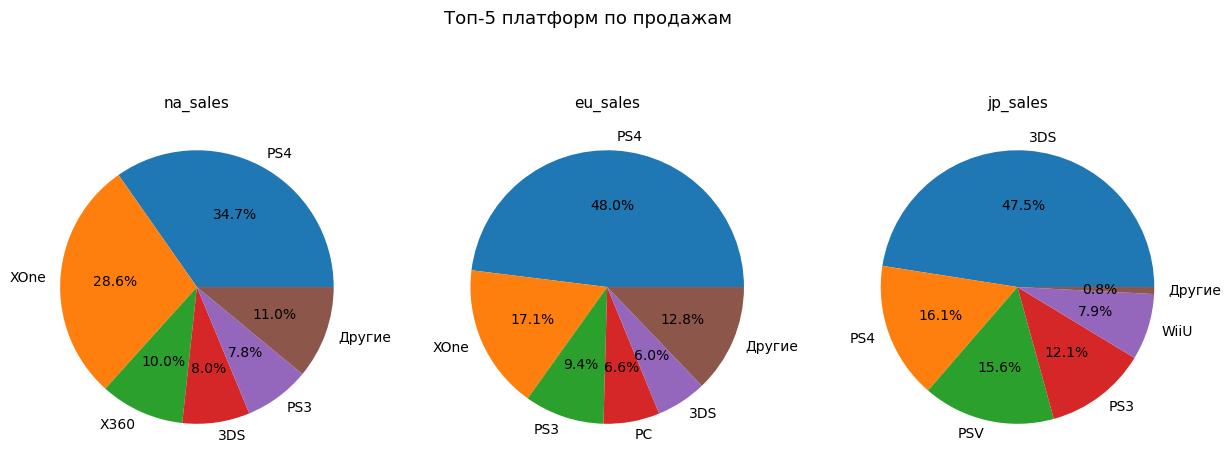

In [70]:
# Визуализируем распределение продаж по платформам в каждом регионе
fig, ax = plt.subplots(figsize=(15, 5))  

i=1    

for region in ['na_sales', 'eu_sales', 'jp_sales']:   
    # Группировка и суммирование продаж по платформе
    sales_by_platform = df.groupby('platform')[region].sum().sort_values(ascending=False).reset_index()
    # Получение первых пяти строк
    top_5 = sales_by_platform.head(5)
    # Суммирование продаж с 6-й по 12-ю строку
    other_sales = sales_by_platform.loc[5:11, region].sum()
    # Создание строки "другие" с суммой продаж
    other_row = pd.DataFrame({'platform': ['Другие'], region: [other_sales]})
    # Объединение первых пяти строк и строки "другие"
    top_5 = pd.concat([top_5, other_row])
    # Вычисление доли продаж в процентах
    top_5['percentage'] = (top_5[region] / top_5[region].sum() * 100).round(1)

    # Создание графика
    plt.subplot(1, 3, i)
    ax = plt.pie(data=top_5, x=region, labels=top_5['platform'], autopct='%1.1f%%')
    i += 1
    plt.title(region, fontsize=11)
      
plt.suptitle('Топ-5 платформ по продажам', fontsize=13, y=1.05);   

Портреты пользователей Северной Америки и Европы по популяности платформ достаточно близки,  4 из ТОП-5 совпадают. У пользователей Японии другие предпочтения, из ТОП-5 платформ Северной Америки и Европы, только две входят в ТОП-5 Японии.

In [71]:
# получим ТОП-5 жанров по продажам в каждом регионе
for region in ['na_sales', 'eu_sales', 'jp_sales']:  
    sales_distribution('genre', region)

,genre,na_sales,percentage_of_total
0,Shooter,79.02,27.82
1,Action,72.53,25.53
2,Sports,46.13,16.24
3,Role-Playing,33.47,11.78
4,Misc,15.05,5.30


,genre,eu_sales,percentage_of_total
0,Action,74.68,27.59
1,Shooter,65.52,24.21
2,Sports,45.73,16.89
3,Role-Playing,28.17,10.41
4,Racing,14.13,5.22


,genre,jp_sales,percentage_of_total
0,Role-Playing,31.16,33.47
1,Action,29.58,31.78
2,Fighting,6.37,6.84
3,Misc,5.61,6.03
4,Shooter,4.87,5.23


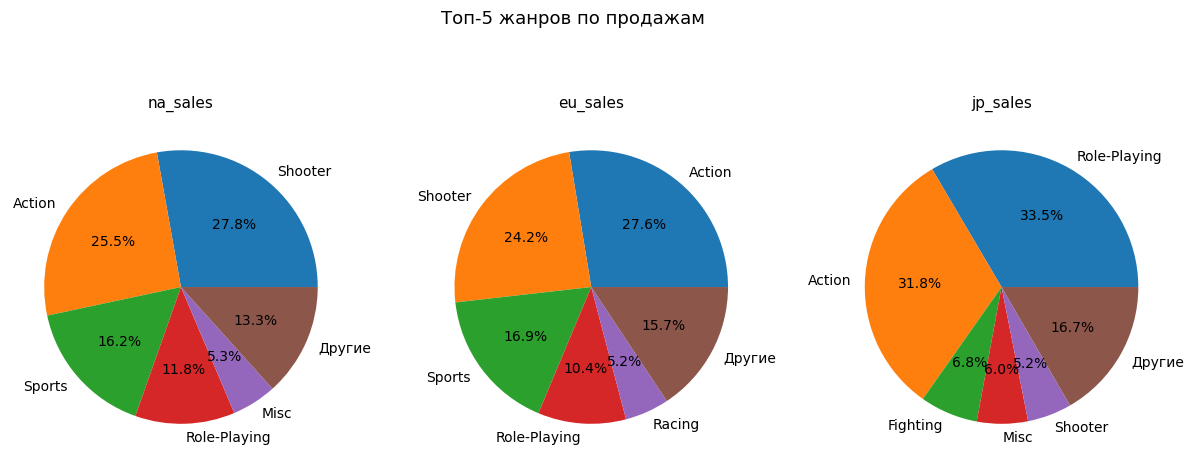

In [72]:
# Визуализируем распределение продаж по жанрам в каждом регионе
fig, ax = plt.subplots(figsize=(15, 5))  

i=1    

for region in ['na_sales', 'eu_sales', 'jp_sales']:   
    # Группировка и суммирование продаж по платформе
    sales_by_platform = df.groupby('genre')[region].sum().sort_values(ascending=False).reset_index()
    # Получение первых пяти строк
    top_5 = sales_by_platform.head(5)
    # Суммирование продаж с 6-й по 12-ю строку
    other_sales = sales_by_platform.loc[5:11, region].sum()
    # Создание строки "другие" с суммой продаж
    other_row = pd.DataFrame({'genre': ['Другие'], region: [other_sales]})
    # Объединение первых пяти строк и строки "другие"
    top_5 = pd.concat([top_5, other_row])
    # Вычисление доли продаж в процентах
    top_5['percentage'] = (top_5[region] / top_5[region].sum() * 100).round(1)

    # Создание графика
    plt.subplot(1, 3, i)
    ax = plt.pie(data=top_5, x=region, labels=top_5['genre'], autopct='%1.1f%%')
    i += 1
    plt.title(region, fontsize=11)
      
plt.suptitle('Топ-5 жанров по продажам', fontsize=13, y=1.05);   

Портреты пользователей Северной Америки, Европы и Японии по популяности жанров близки. Портреты пользователей Северной Америки, Европы практически не отличаются, пользователи Японии находятся от них чуть подальше.

Северная Америка - Европа: 4 общих жанра из пяти.

Северная Америка - Япония: 4 общих жанра из пяти.

Европа - Япония: 3 общих жанра из пяти.

**Оценим влияние рейтинга ESRB на продажи в отдельном регионе.**

In [73]:
# посчитаем количество уникальных значений
df['rating'].value_counts()

rating
unrated    749
T          271
M          265
E          219
E10+       185
Name: count, dtype: int64

Не будем использовать в анализе рейтинги ЕС и RP в связи с недостаточным количеством данных.

In [74]:
# исключим рейтинги ЕС и RP
df_rating = df[df['rating'].isin(df['rating'].value_counts().index[:5])]

In [75]:
# проверим преобразование
df_rating['rating'].value_counts()

rating
unrated    749
T          271
M          265
E          219
E10+       185
Name: count, dtype: int64

**E (Everyone)**: Рекомендуется для всех возрастов. Игры с рейтингом "E" содержат контент, приемлемый для всех возрастных групп. Они могут включать мягкое насилие, минимальную агрессию, шуточный или комический контент.

**M (Mature)**: Рекомендуется для лиц старше 17 лет. Игры с рейтингом "M" содержат контент, который может быть неприемлемым для детей и подростков. Они могут содержать интенсивное насилие, сексуальный контент, крепкий язык и материалы, которые требуют взрослого подхода.

**T (Teen)**: Рекомендуется для лиц старше 13 лет. Игры с рейтингом "T" содержат контент, который может быть неприемлемым для детей младшего возраста. Они могут включать некоторое насилие, легкий язык, намеки на сексуальность и/или минимальную агрессию.

**E10+ (Everyone 10 and older)**: Рекомендуется для лиц старше 10 лет. Игры с рейтингом "E10+" содержат контент, который может быть неприемлемым для детей младшего возраста.

EC (Early Childhood): Рекомендуется для детей младшего возраста. Игры с рейтингом "EC" содержат контент, специально разработанный для детей младшего возраста (обычно до 6 лет). Они обычно включают образовательные и развивающие материалы без насилия или контента, несовместимого с маленькими детьми.

RP (Rating Pending): Этот рейтинг означает, что игра еще не получила окончательную рекомендацию рейтинга от ESRB. Он используется для игр, которые находятся в процессе оценки и еще не были классифицированы.

In [76]:
# сгруппируем продажи игр в Северной Америке по рейтингам
df_rating.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

rating
M          96.42
unrated    64.72
E          50.74
T          38.95
E10+       33.23
Name: na_sales, dtype: float64

В Северной Америке по рейтингам продажи распределяются следующим образом: М, без рейтинга, Е, Т и Е10+.

In [77]:
# сгруппируем продажи игр в Европе по рейтингам
df_rating.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

rating
M          93.44
unrated    58.95
E          58.06
T          34.07
E10+       26.16
Name: eu_sales, dtype: float64

В Европе картина точно такая же как и в Америке. 

In [78]:
# сгруппируем продажи игр в Японии по рейтингам
df_rating.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

rating
unrated    56.90
T          14.78
E           8.94
M           8.01
E10+        4.46
Name: jp_sales, dtype: float64

В Японии принципиально другой портрет пользователей в части рейтингов игр. С большим отрывом в разы лидируют игры без рейтинга.
Затем следуют рейтинги Т, Е, М и Е10+. 

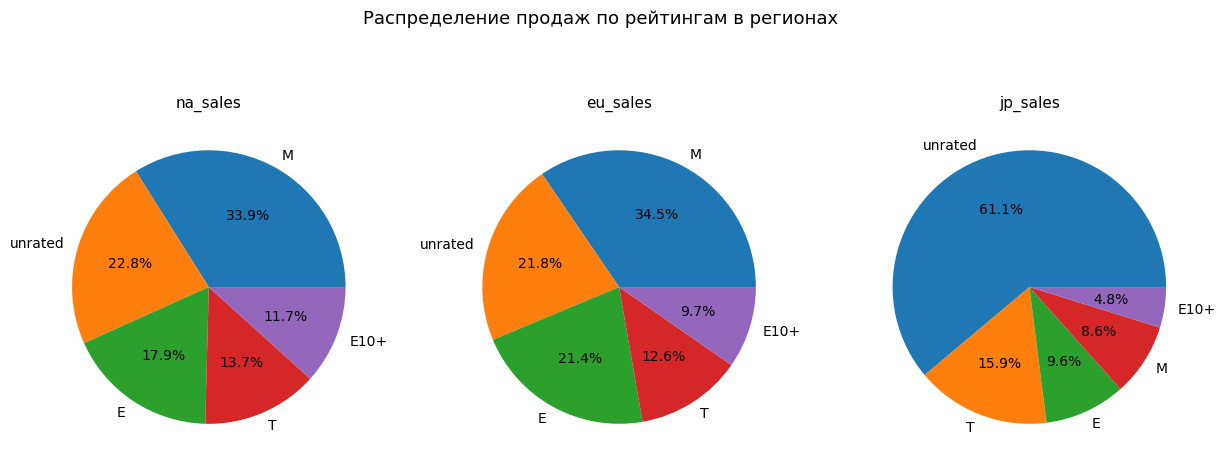

In [79]:
# Визуализируем распределение продаж по жанрам в каждом регионе
fig, ax = plt.subplots(figsize=(15, 5))  

i=1    

for region in ['na_sales', 'eu_sales', 'jp_sales']:   
    top_rating = df_rating.groupby('rating')[region].sum().sort_values(ascending=False).reset_index()
    # Вычисление доли продаж в процентах
    top_rating['percentage'] = (top_rating[region] / top_rating[region].sum() * 100).round(1)

    # Создание графика
    plt.subplot(1, 3, i)
    ax = plt.pie(data=top_rating, x=region, labels=top_rating['rating'], autopct='%1.1f%%')
    i += 1
    plt.title(region, fontsize=11)
      
plt.suptitle('Распределение продаж по рейтингам в регионах', fontsize=13, y=1.05);   

#### Выводы
В Северной Америке по рейтингам продажи распределяются следующим образом: М, без рейтинга, Е, Т и Е10+.

В Европе картина точно такая же как и в Америке. 

В Японии принципиально другой портрет пользователей в части рейтингов игр. С большим отрывом в разы лидируют игры без рейтинга.
Затем следуют рейтинги Т, Е, М и Е10+. 

### Шаг 5. Проверка гипотез

**Гипотеза 1: средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

In [80]:
# найдём средний пользовательский рейтинг платформы 'XOne'
df[df['platform'] == 'XOne']['user_score'].mean()

6.594545454545454

In [81]:
# найдём средний пользовательский рейтинг платформы 'РС'
df[df['platform'] == 'PC']['user_score'].mean()

6.298360655737704

In [82]:
# сформируем выборки с оценками пользователей
XOne_user_score = df[df['platform'] == 'XOne']['user_score'].dropna()
PC_user_score = df[df['platform'] == 'PC']['user_score'].dropna()

Ограничениях в применении критерия Стьюдента:

- Нормальность распределения.

- Гомогенность дисперсий: если дисперсии существенно отличаются, результаты теста могут быть неправильными.

- Независимость выборок

Проверим выполнение этих ограничений

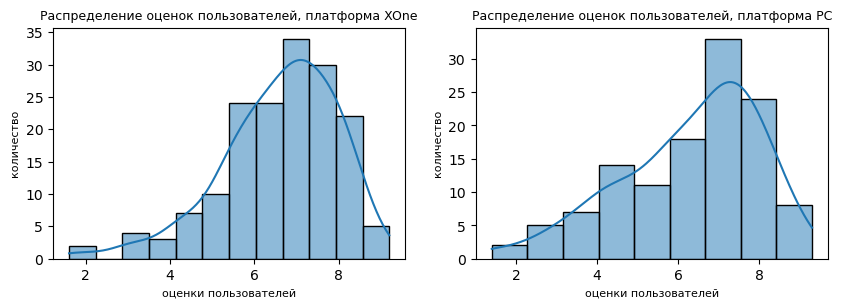

In [83]:
# построим распределения
fig, ax = plt.subplots(figsize=(10, 3))

plt.subplot(1, 2, 1)
ax=sns.histplot(data=XOne_user_score, kde=True)
ax.set_title('Распределение оценок пользователей, платформа XOne', fontsize=9)
ax.set_xlabel('оценки пользователей', fontsize=8)
ax.set_ylabel('количество', fontsize=8)

plt.subplot(1, 2, 2)
ax=sns.histplot(data=PC_user_score, kde=True)
ax.set_title('Распределение оценок пользователей, платформа РС', fontsize=9)
ax.set_xlabel('оценки пользователей', fontsize=8)
ax.set_ylabel('количество', fontsize=8);

In [84]:
# рассчитаем дисперсии выборок
display(np.var(XOne_user_score))
display(np.var(PC_user_score))

1.87954600550964

2.877374361730719

Будем считать, что ограничения в использовани теста Стьюдента с некоторыми допущениями выполняются.

Сформулируем гипотезы.

Но - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Н1 - средние пользовательские рейтинги платформ Xbox One и PC отличаются.

In [85]:
import scipy.stats as st

# задаём уровень значимости
alpha = 0.05

# проводим ttest для двух выборок, в качестве альтернативной используем двустороннюю гипотезу 
results = st.ttest_ind(XOne_user_score, PC_user_score, alternative='two-sided')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.10450507919348415
Нет оснований отвергнуть нулевую гипотезу


#### Выводы
Средние пользовательские рейтинги платформ Xbox One и PC имеют статитстически значимые отличия

**Гипотеза 2 - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

In [86]:
# найдём средний пользовательский рейтинг жанра 'Action'
df[df['genre'] == 'Action']['user_score'].mean()

6.760606060606061

In [87]:
# найдём средний пользовательский рейтинг жанра 'Sports'
df[df['genre'] == 'Sports']['user_score'].mean()

5.225196850393701

In [88]:
# сформируем выборки с оценками пользователей
Action_user_score = df[df['genre'] == 'Action']['user_score'].dropna()
Sports_user_score = df[df['genre'] == 'Sports']['user_score'].dropna()

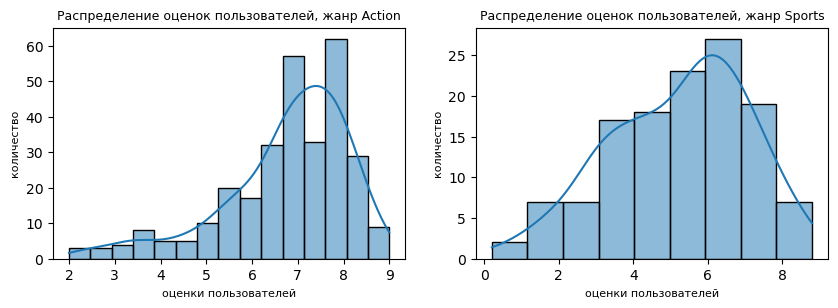

In [89]:
# построим распределения
fig, ax = plt.subplots(figsize=(10, 3))

plt.subplot(1, 2, 1)
ax=sns.histplot(data=Action_user_score, kde=True)
ax.set_title('Распределение оценок пользователей, жанр Action', fontsize=9)
ax.set_xlabel('оценки пользователей', fontsize=8)
ax.set_ylabel('количество', fontsize=8)

plt.subplot(1, 2, 2)
ax=sns.histplot(data=Sports_user_score, kde=True)
ax.set_title('Распределение оценок пользователей, жанр Sports', fontsize=9)
ax.set_xlabel('оценки пользователей', fontsize=8)
ax.set_ylabel('количество', fontsize=8);

In [90]:
# рассчитаем дисперсии выборок
display(np.var(Action_user_score))
display(np.var(Sports_user_score))

1.8920844811753907

3.419837559675118

Будем считать, что ограничения в использовании теста Стьюдента с некоторыми допущениями выполняются.

Сформулируем гипотезы.

Но - средние пользовательские рейтинги жанров Action и Sports одинаковые.

Н1 - средние пользовательские рейтинги жанров Action и Sports разные.

In [91]:
# задаём уровень значимости
alpha = 0.05

# проводим ttest для двух выборок, в качестве альтернативной используем двустороннюю гипотезу 
results = st.ttest_ind(Action_user_score, Sports_user_score, alternative='two-sided')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


#### Выводы
Средние пользовательские рейтинги жанров Action и Sports не имеют статитстически значимых отличий при уровне значимости 0,05.

## Выводы
В результате исследования мы выполнили следующее.
#### 1. Загрузили данные и изучили общую информацию.
Объем данных: 16 715 строк, 11 столбцов. Временной период: с 1980 по 2016 год. Данные не полные, наибольшее количество пропущенных данных в столбцах: critic_score (51%), user_score (55%), rating (40%).



#### 2. Провели предобработку данных.
Перевели аббревиатуру "tbd" в столбце user_score в Nan для обеспечения возможности выполнения операций с данными столбца.

Мы изменили типы данных в столбце user_score на float.

Пропуски данных в основном связаны с двумя причинами. С одной стороны в начале 1980-х годов играм практически не давали оценок и не присваивали рейтинг. С другой стороны не всем играм давали оценки и присваивали рейтинги, и это практически одни и те же игры. Можно предположить, что наименее интересным играм не давали оценки критики, пользователи и почти не присваивали рейтинги.

#### 3. Провели исследовательский анализ данных:
- Определили сколько игр выпускалось в разные годы. 

Рост количества игр начался в 1990-х годах, когда их количество выросло с нескольких десятков в год до нескольких сотен.  Максимума количество выпусков игр достигло в 2008 - 2009 годах и составило более 1400 ед. в год. С 2009 года количество выпусков игр устойчиво снижалось и составило в 2016 году 502 ед.

- Проанализировали, как менялись продажи по платформам. Определили платформы с наибольшими суммарными продажами и построили распределение по годам.

Продажи по платформам существенно отличаются. Отличия могут достигать десятков и сотен раз. Среднее значение продаж - 287,6 млн. копий, максимальное - 1255,8 млн.копий, минимальное - 0,03 млн. копий. Топ-3 платформы с наибольшими продажами: PS2, Х360, PS3. 
На большинстве платформ продажи закончились.

Среднее время "жизни" платформ - 7,6 года, медиана - 6 лет. Стандартное отклонение достаточно большое - 7 лет, разброс от 0 до 31 года.

Определили актуальный период данных для прогноза на 2017 год, это данные с 2009 по 2016 год. Выбрали несколько потенциально прибыльных платформ. По продажам в 2016 году лидируют платформы PS4, XOne и 3DS. На всех платформах продажи снижаются, растущих по продажам платформ нет. В большинстве случаев продажи по платформам распределяются в диапазоне 0.1 - 0.75. Медианы находятся в районе 0,25 и ниже. При этом распределения имеют очень длинные правые "хвосты". Отдельные продажи превышают медианные значения в десятки раз.

- Проанализировали влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков.

Продажи зависят от оценок критиков и пользователей. Зависимость от оценок критиков существенно сильнее. Зависимость нелинейная. При самых высоких оценках критиков и пользователей возможны очень высокие продажи, в десятки раз превышающие средние значения.
Для платформы PS4 корреляция (по методу Спирмена) между оценками критиков и продажами составляет 0.54, между оценками пользователей и продажами составляет 0.19.

- Проанализировали общее распределение игр и продаж по жанрам.

Продажи игр существенно зависят от жанра.

Топ-5 жанров по средним продажам игр: Shooter, Platform, Sports, Role-Playing, Racing.

Топ-5 жанров по медианным продажам игр: Shooter, Platform, Sports, Fighting, Racing.

Средние продажи игр в разы превышают медианные, это говорит о том, что есть отдельные игры с очень большим количеством продаж.


#### 4. Составили портрет пользователя каждого региона. Определили для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5) и жанры (топ-5). Оценили влияние рейтинга ESRB на продажи в отдельном регионе.

Портреты пользователей Северной Америки и Европы по популяности платформ достаточно близки, 4 из ТОП-5 совпадают. У пользователей Японии другие предпочтения, из ТОП-5 платформ Северной Америки и Европы, только две входят в ТОП-5 Японии.

Портреты пользователей Северной Америки, Европы и Японии по популяности жанров близки. Портреты пользователей Северной Америки, Европы практически не отличаются, пользователи Японии находятся от них чуть подальше.

Северная Америка - Европа: 4 общих жанра из пяти.

Северная Америка - Япония: 4 общих жанра из пяти.

Европа - Япония: 3 общих жанра из пяти.

**Влияние рейтинга ESRB на продажи.**

В Северной Америке по рейтингам продажи распределяются следующим образом: М, без рейтинга, Е, Т и Е10+.

В Европе картина точно такая же как и в Америке. 

В Японии принципиально другой портрет пользователей в части рейтингов игр. С большим отрывом в разы лидируют игры без рейтинга.
Затем следуют рейтинги Т, Е, М и Е10+. 

#### 5. Проверили гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.

Статистический тест Стьюдента показал, что средние пользовательские рейтинги платформ Xbox One и PC имеют статитстически значимые отличия.

- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Статистический тест Стьюдента показал, что средние пользовательские рейтинги жанров Action и Sports не имеют статистически значимых отличий при уровне значимости 0,05.


#### 6. Выводы и рекомендации для компании 2017 года.

1. В 2017 году следует ожидать продаж существенно меньше, чем 2016 году. Это связано с тем, что продажи с 2009 года стабильно снижаются и нет ни одной платформы, на которой бы наблюдался рост продаж. Только на 9-ти платформах из 31 в 2016 году были продажи.
2. Наибольшую рекламную активность целесообразно направить на Топ-3 платформы из 9-ти на которых были продажи в 2016 году. Это: PS4, XOne, 3DS. 
3. Целесообразно сконцентрировать усилия на наиболее продаваемых жанрах: Shooter, Platform, Sports, Role-Playing, Racing.
4. Для хороших продаж важны оценки критиков и несколько менее важны оценки пользователей. Так при высоких оценках критиков и пользователей возможны исключительно высокие продажи игр, превышающие средние значения продаж в десятки и сотни раз.